In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = file_path = '/Users/bhavya/Downloads/flat-ui__data-Mon Apr 28 2025.csv'
df = pd.read_csv(file_path)


# Basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1341 non-null   object 
 1   TIME         1341 non-null   int64  
 2   PC_HEALTHXP  1341 non-null   float64
 3   PC_GDP       1341 non-null   float64
 4   USD_CAP      1341 non-null   float64
 5   TOTAL_SPEND  1341 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 63.0+ KB


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,TOTAL_SPEND
0,AUS,1971,15.992,0.726,33.990,439.73
1,AUS,1972,15.091,0.685,34.184,450.44
2,AUS,1973,15.117,0.681,37.956,507.85
3,AUS,1974,14.771,0.754,45.338,622.17
4,AUS,1975,11.849,0.682,44.363,616.34


In [9]:
print(df.isnull().sum())


LOCATION       0
TIME           0
PC_HEALTHXP    0
PC_GDP         0
USD_CAP        0
TOTAL_SPEND    0
dtype: int64


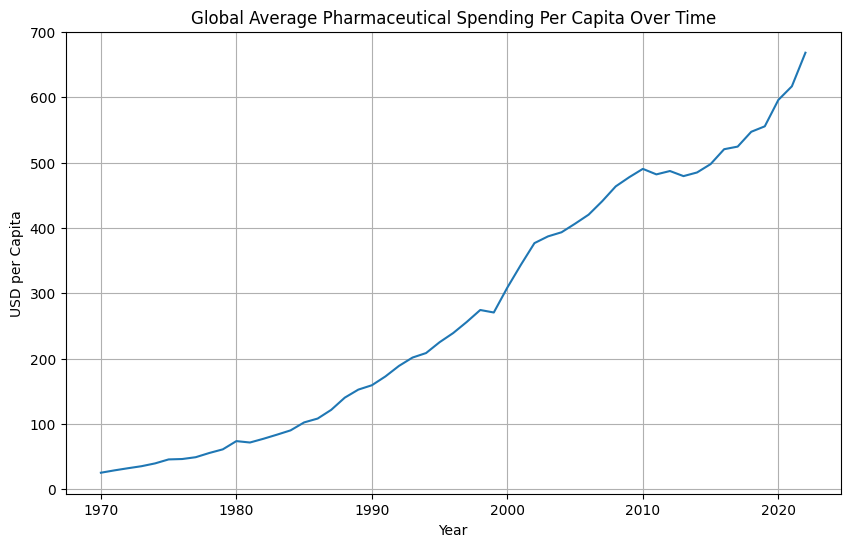

In [10]:
# 3. Global Trends
# Global average over time
global_trend = df.groupby('TIME').mean(numeric_only=True)

plt.figure(figsize=(10, 6))
plt.plot(global_trend.index, global_trend['USD_CAP'])
plt.title('Global Average Pharmaceutical Spending Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('USD per Capita')
plt.grid(True)
plt.show()



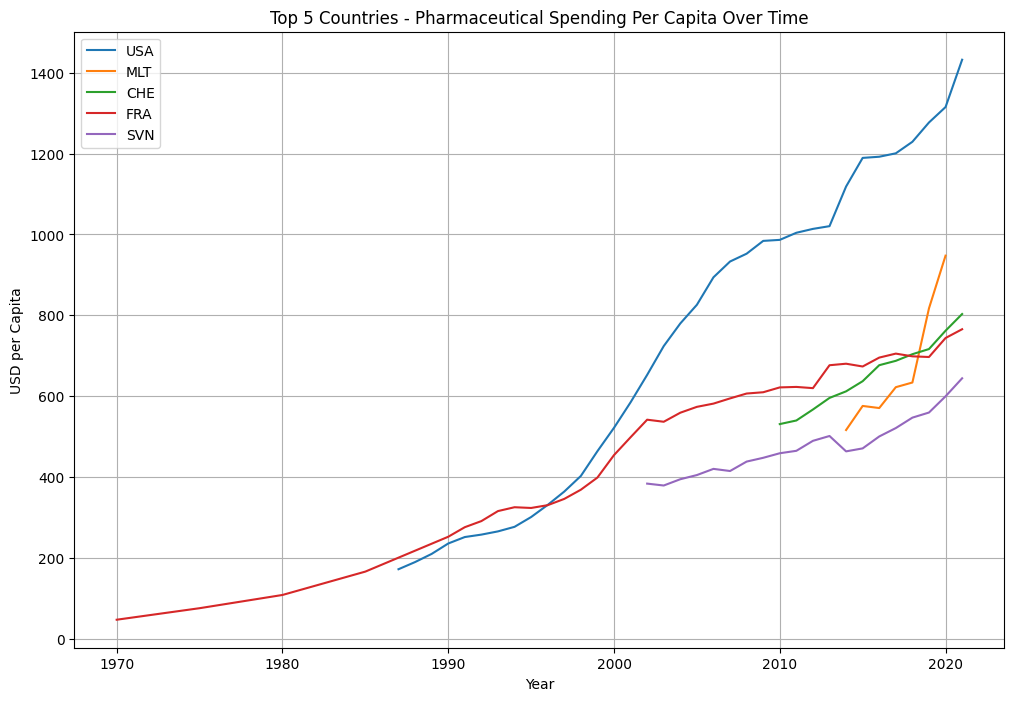

In [11]:
# 4. Country-Level Trends
# Top 5 countries by average spending per capita
top_countries = df.groupby('LOCATION')['USD_CAP'].mean().sort_values(ascending=False).head(5).index

# Plotting top countries
plt.figure(figsize=(12, 8))
for country in top_countries:
    subset = df[df['LOCATION'] == country]
    plt.plot(subset['TIME'], subset['USD_CAP'], label=country)

plt.title('Top 5 Countries - Pharmaceutical Spending Per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('USD per Capita')
plt.legend()
plt.grid(True)
plt.show()


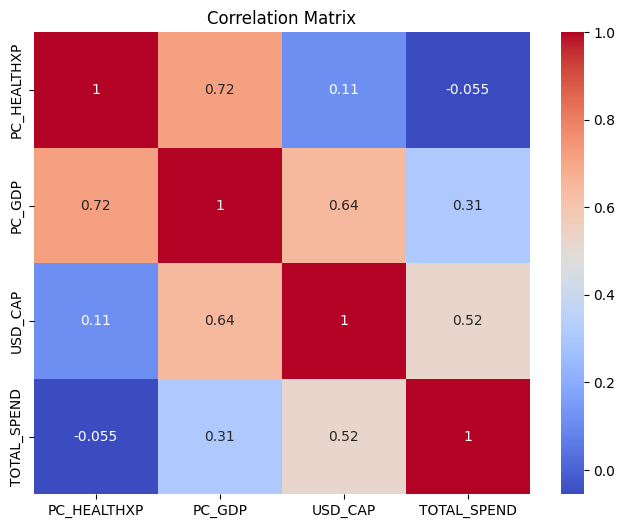

In [12]:
# 5. Correlation Analysis
# Correlation matrix
corr = df[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Top 10 Countries in 2022
     LOCATION  USD_CAP
202       CAN  914.325
877       KOR  803.251
786       ITA  748.081
940       LUX  706.372
736       ISL  632.479
1039      NLD  472.093
378       DNK  401.686

Bottom 10 Countries in 2022
     LOCATION  USD_CAP
378       DNK  401.686
1039      NLD  472.093
736       ISL  632.479
940       LUX  706.372
786       ITA  748.081
877       KOR  803.251
202       CAN  914.325


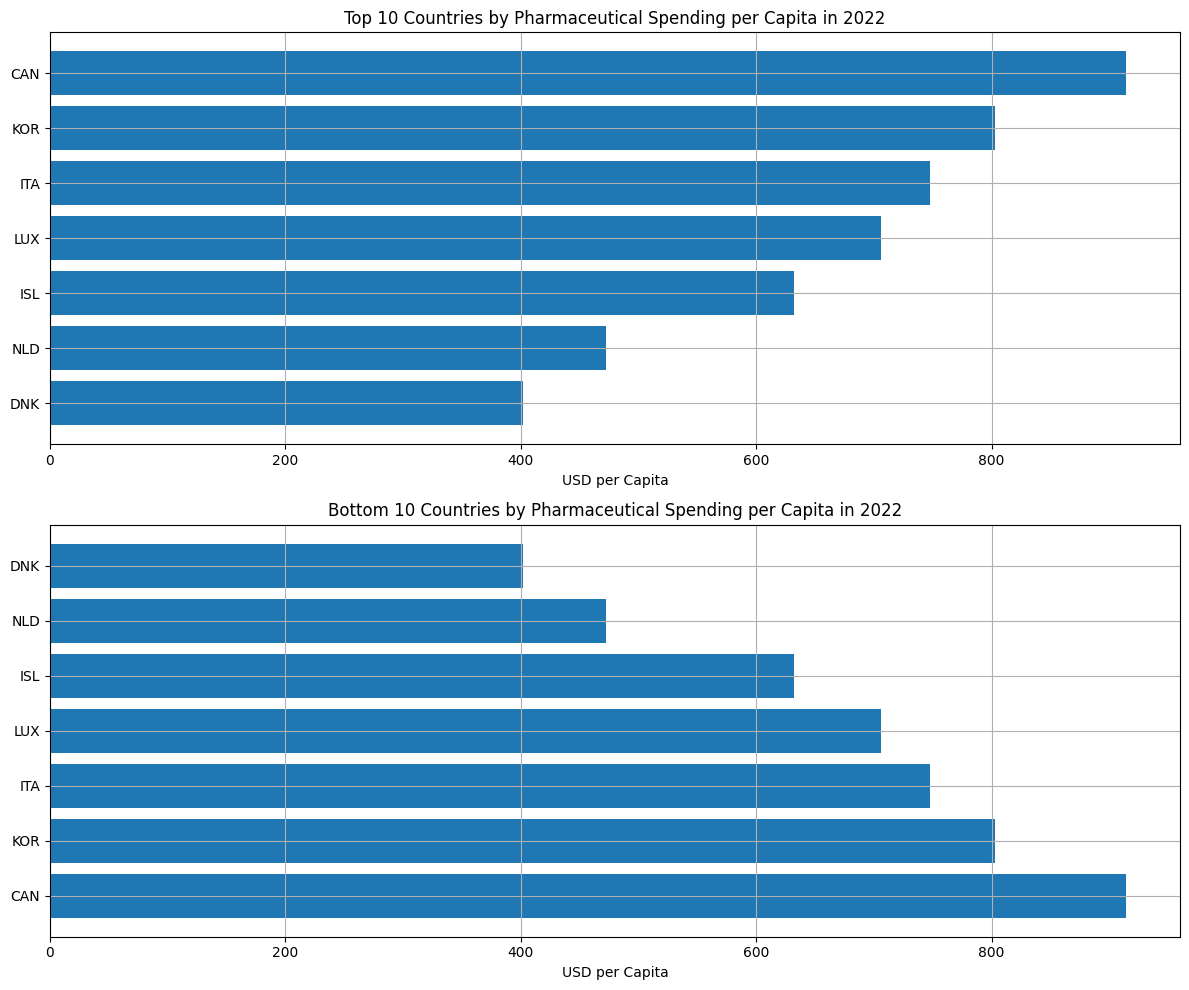

In [15]:
# 6. Top and Bottom Spenders
# Latest year
latest_year = df['TIME'].max()

# Data for the latest year
latest_data = df[df['TIME'] == latest_year]

# Top and bottom 10 countries
top10 = latest_data.sort_values('USD_CAP', ascending=False).head(10)
bottom10 = latest_data.sort_values('USD_CAP', ascending=True).head(10)

print("Top 10 Countries in", latest_year)
print(top10[['LOCATION', 'USD_CAP']])

print("\nBottom 10 Countries in", latest_year)
print(bottom10[['LOCATION', 'USD_CAP']])

# Set up the figure
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top 10 countries bar plot
axes[0].barh(top10['LOCATION'], top10['USD_CAP'])
axes[0].set_title(f'Top 10 Countries by Pharmaceutical Spending per Capita in {latest_year}')
axes[0].set_xlabel('USD per Capita')
axes[0].invert_yaxis()  # Highest spender on top
axes[0].grid(True)

# Bottom 10 countries bar plot
axes[1].barh(bottom10['LOCATION'], bottom10['USD_CAP'])
axes[1].set_title(f'Bottom 10 Countries by Pharmaceutical Spending per Capita in {latest_year}')
axes[1].set_xlabel('USD per Capita')
axes[1].invert_yaxis()  # Highest (of the lowest) on top
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/5r/xh19j2bn21x8hzz1fp47sjdm0000gn/T/ipykernel_8563/2835528804.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Cluster'] = kmeans.labels_


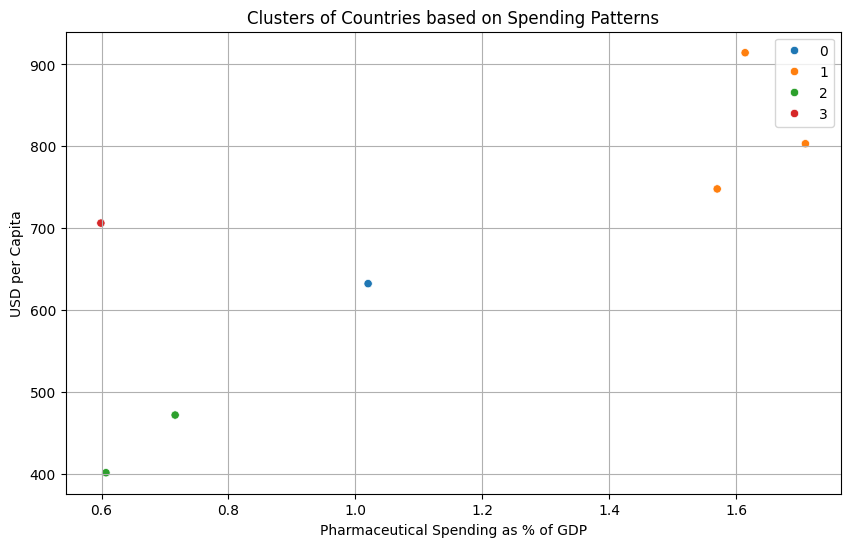

In [17]:
# 7. Clustering (Optional)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare the data
X = latest_data[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Attach cluster labels
latest_data['Cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_data, x='PC_GDP', y='USD_CAP', hue='Cluster', palette='tab10')
plt.title('Clusters of Countries based on Spending Patterns')
plt.xlabel('Pharmaceutical Spending as % of GDP')
plt.ylabel('USD per Capita')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# 8. Conclusions
print("Pharmaceutical spending has generally increased globally over time.")
print("Top spenders per capita are often developed countries with high GDP.")
print("Strong positive correlation between pharmaceutical spending and health expenditure.")
print("Clustering reveals distinct groups of countries based on their spending behavior.")


Pharmaceutical spending has generally increased globally over time.
Top spenders per capita are often developed countries with high GDP.
Strong positive correlation between pharmaceutical spending and health expenditure.
Clustering reveals distinct groups of countries based on their spending behavior.
